In [0]:
import pandas as pd
import numpy as np

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
url = 'https://raw.githubusercontent.com/ritwiksinha53/winequality-red/master/winequality-red.csv'

In [0]:
wine_df = pd.read_csv(url, sep=';')

In [0]:
wine_df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [0]:
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix

from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


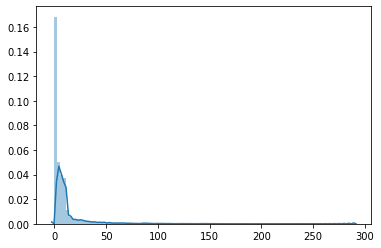

In [0]:
sns.distplot(wine_df.unstack(), 100)

In [0]:
wine_df.unstack()

fixed acidity  0        7.4
               1        7.8
               2        7.8
               3       11.2
               4        7.4
                       ... 
quality        1594     5.0
               1595     6.0
               1596     6.0
               1597     5.0
               1598     6.0
Length: 19188, dtype: float64

In [0]:
wine_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [0]:
wine_df.shape

(1599, 12)

In [0]:
wine_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [0]:
#levels of Y variable
wine_df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [0]:
wine_df['quality'] = wine_df['quality'].replace(7,6)
wine_df['quality'] = wine_df['quality'].replace(4,5)
wine_df['quality'] = wine_df['quality'].replace(8,5)
wine_df['quality'] = wine_df['quality'].replace(3,5)
wine_df['quality'].value_counts()

6    837
5    762
Name: quality, dtype: int64

In [0]:
fig = px.scatter(wine_df, x='quality', y='fixed acidity')
fig.show()

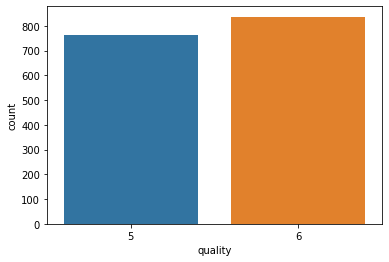

In [0]:
sns.countplot(wine_df['quality'])

In [0]:
fig = px.box(wine_df, x="quality", y="volatile acidity", points="all")
fig.show()

In [0]:
fig = px.box(wine_df, x="quality", y="citric acid", points="all")
fig.show()

In [0]:
fig = px.pie(wine_df, values='residual sugar', names='quality')
fig.show()

In [0]:
fig = px.box(wine_df, x="quality", y="chlorides", points="all")
fig.show()

In [0]:
fig = px.box(wine_df, x="quality", y="free sulfur dioxide", points="all")
fig.show()

In [0]:
fig = px.box(wine_df, x="quality", y="total sulfur dioxide", points="all")
fig.show()

In [0]:
fig = px.box(wine_df, x="quality", y="density", points="all")
fig.show()

In [0]:
fig = px.box(wine_df, x="quality", y="pH", points="all")
fig.show()

In [0]:
fig = px.box(wine_df, x="quality", y="sulphates", points="all")
fig.show()

In [0]:
fig = px.box(wine_df, x="quality", y="alcohol", points="all")
fig.show()

In [0]:
import plotly.figure_factory as ff

In [0]:
corrs = wine_df.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
figure.show()

Another way to plot correlation matrix using Seaborn

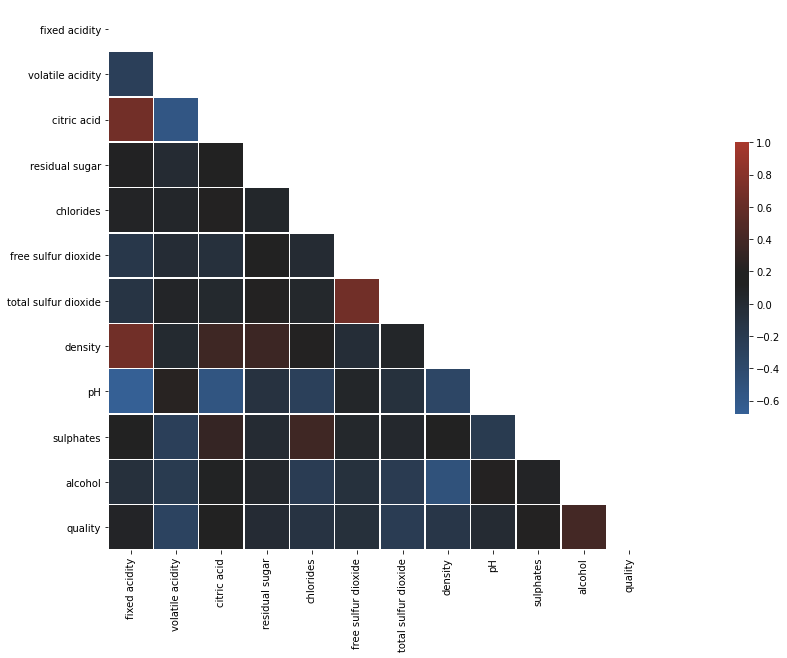

In [0]:
corr = wine_df.corr()
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                                  n=12, center="dark", as_cmap = True)
f, ax = plt.subplots(figsize=(30, 10))
ax = sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 1,square = True,
            linewidths = .5, cbar_kws = {"shrink": .5}, ax = ax)
plt.show()

In [0]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(wine_df.drop('quality',axis=1), wine_df['quality'], test_size=.25,
                                                   random_state=22)
X_train.shape,X_test.shape

((1199, 11), (400, 11))

In [0]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index.  Restricting the depth of the tree to 3 and size of the leaf node to 5 (no particular reason for 
# selecting this)

model_entropy=DecisionTreeClassifier(criterion='entropy')

In [0]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
model_entropy.score(X_train, y_train)  # performance on train data

1.0

In [0]:
model_entropy.score(X_test, y_test)  # performance on test data

0.74

In [0]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=5, min_samples_leaf=5, splitter = "random", min_samples_split = 10)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='random')

In [0]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
import graphviz

xvar = wine_df.drop('quality', axis=1)
feature_cols = xvar.columns

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



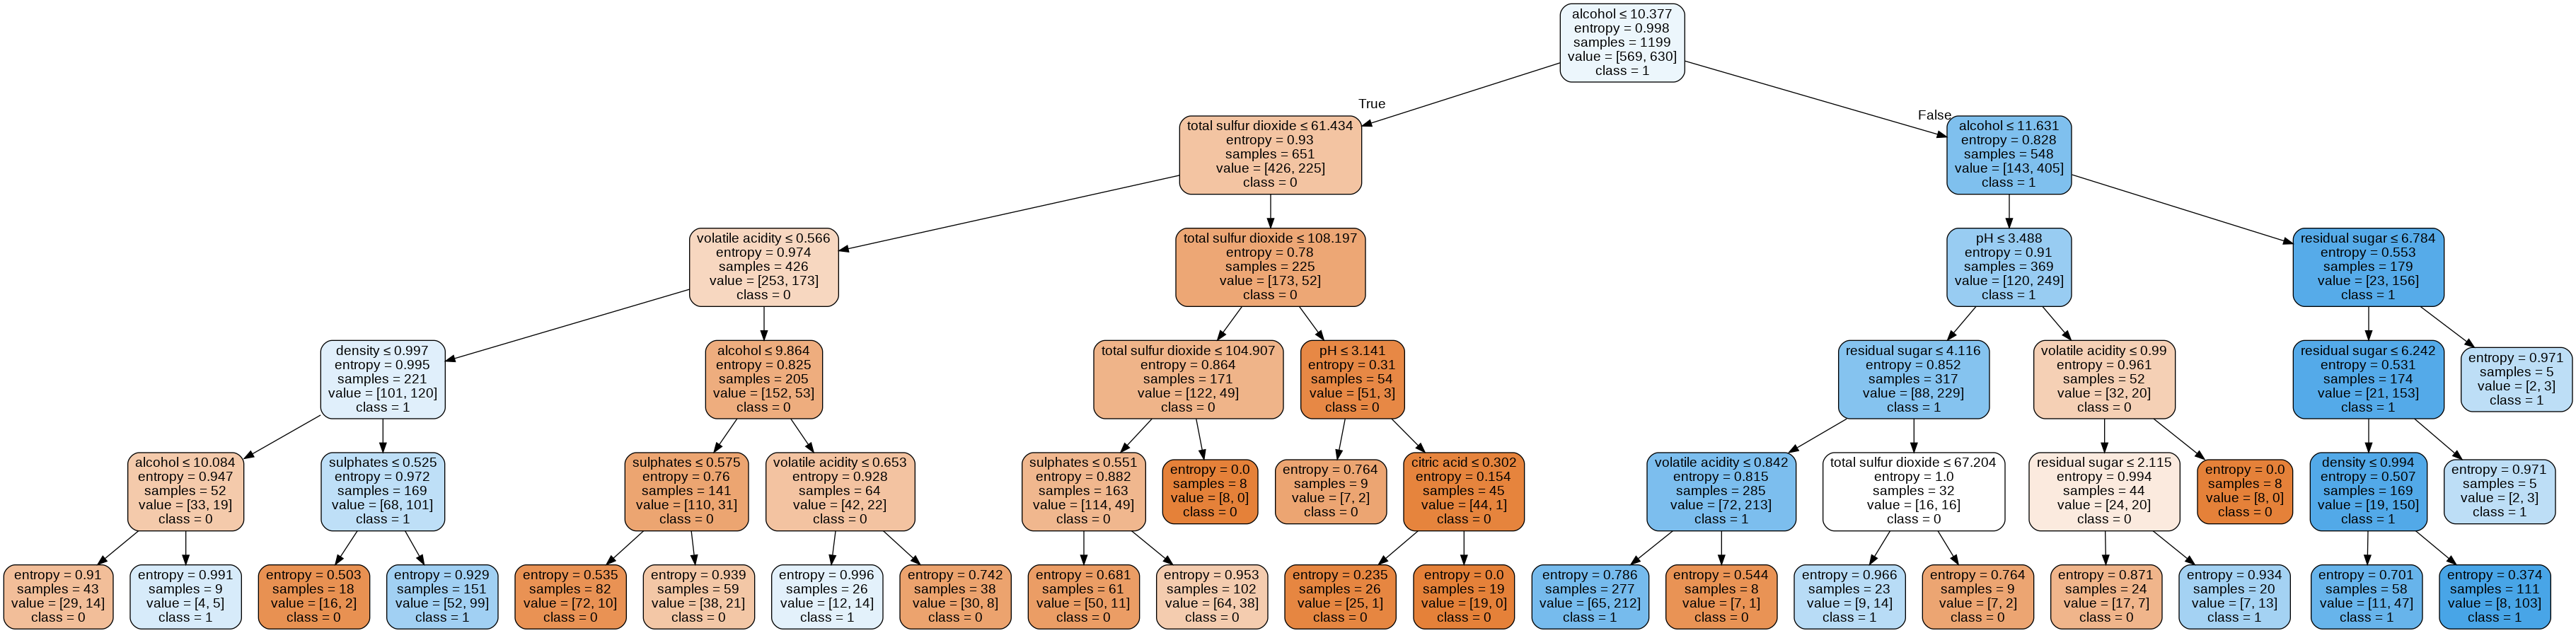

In [0]:
dot_data = StringIO()
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('wines_pruned.png')
Image(graph.create_png())

In [0]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)

In [0]:
print(accuracy_score(y_test,preds_pruned))
print(accuracy_score(y_train,preds_pruned_train))

0.7475
0.7589658048373644


In [0]:
acc_DT = accuracy_score(y_test, preds_pruned)

In [0]:
## Calculating feature importance

feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
alcohol,0.513622
volatile acidity,0.154374
total sulfur dioxide,0.105287
sulphates,0.089621
pH,0.059575
residual sugar,0.043338
density,0.031606
citric acid,0.002577
fixed acidity,0.000000
chlorides,0.000000


In [0]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.7475


BAGGING CLASSIFIER

In [0]:
from sklearn import model_selection 
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier 
import pandas as pd 
  
  
#X = wine_df.drop('quality',axis=1)
#Y = wine_df['quality']
seed = 7
kfold = model_selection.KFold(n_splits = 4, 
                       random_state = seed, shuffle = True)

In [0]:
base_cls = DecisionTreeClassifier() 
  
# no. of base classifier 
num_trees = 500
  
# bagging classifier 
model = BaggingClassifier(base_estimator = base_cls, 
                          n_estimators = num_trees, 
                          random_state = seed) 
  
results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold) 
print("Training accuracy :") 
print(results.mean())

results1 = model_selection.cross_val_score(model, X_test, y_test, cv = kfold) 
print("Testing accuracy :") 
print(results1.mean())

Training accuracy :
0.7848076923076923
Testing accuracy :
0.7075


XG BOOST CLASSIFIER

In [0]:
# fit model no training data
from xgboost import XGBClassifier
model_xg = XGBClassifier()
model_xg.fit(X_train, y_train)
# make predictions for test data
y_pred = model_xg.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 72.00%


GRADIENT BOOSTING

In [0]:
# Loss function to be optimized
loss = ['ls', 'lad', 'huber']

# Number of trees used in the boosting process
n_estimators = [100, 500, 900, 1100, 1500]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'loss': loss,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

In [0]:
# Create the model to use for hyperparameter tuning
model = GradientBoostingRegressor(random_state = 42)

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

X_train, X_test, y_train, y_test = train_test_split(wine_df.drop('quality',axis=1), wine_df['quality'], test_size=0.15)

# Fit on the training data
fitting = random_cv.fit(X_train, y_train)


Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.9min finished


In [0]:
#Predict the response for test dataset
y_pred = fitting.predict(X_test)

In [0]:
mae = np.mean(abs(y_pred - y_test))
mae

## MAE is 0.26.88, thus accuracy is 73.12%

0.26866671094716127

RANDOM FOREST

In [0]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(wine_df.drop('quality',axis=1), wine_df['quality'], test_size=0.15)
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion matrix")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification report")
print(result1)
result2 = accuracy_score(y_test, y_pred)
print("Accuracy")
print(result2)

Confusion matrix
[[101  22]
 [ 18  99]]
Classification report
              precision    recall  f1-score   support

           5       0.85      0.82      0.83       123
           6       0.82      0.85      0.83       117

    accuracy                           0.83       240
   macro avg       0.83      0.83      0.83       240
weighted avg       0.83      0.83      0.83       240

Accuracy
0.8333333333333334
